# [GDSA 2017]: WHO is WHO?

In [ ]:
import numpy as np
import time
import sys
# Add the root path (the path above this one) to the pythonpath.
sys.path.insert(0,'../')
from params import get_params

params = get_params()
print "Number of clusters:", params['descriptor_size']
print "Descriptor type:",params['descriptor_type']
print "Keypoint detector:", params['keypoint_type']
print "Resize dimension:", params['max_size']
print "Distance metric:", params['distance_type']

## GET FEATURES

In [5]:
import get_features as GF
params['split'] = 'train'

t = time.time()
X, pca, scaler = GF.stack_features(params)

print "Done. Time elapsed:", time.time() - t
print np.shape(X)

Done. Time elapsed: 114.385612965
(218664, 128)


## TRAIN CODEBOOK: MiniBatchKMeans

In [6]:
t = time.time()
GF.train_codebook(params,X)

print "Done. Time elapsed:", time.time() - t

Done. Time elapsed: 166.809730053


In [7]:
t = time.time()
GF.get_features(params)

print "Done. Time elapsed for training set:", time.time() - t
# Switch to validation set
params['split'] = 'val'

t = time.time()
# Run again
GF.get_features(params)

print "Done. Time elapsed for validation set:", time.time() - t

Done. Time elapsed for training set: 131.623748064
Done. Time elapsed for validation set: 63.050303936


##  RANKING

In [8]:
from rank import *
t = time.time()
rank(params)

print "Done. Time elapsed:", time.time() - t

Done. Time elapsed: 2.01517009735


## EVALUATE RANKINGS: MAP

In [37]:
import eval_rankings as ER
ap_list, dict_ = ER.eval_rankings(params)
print "Number of queries:", len(ap_list)
print "Mean Average Precision", np.mean(ap_list)

Number of queries: 120
Mean Average Precision 0.243596543674


##  EVALUATE RANKINGS: APs

In [38]:
for id in dict_.keys():
    
    if not id == 'desconegut':
        # We divide by 10 because it's the number of images per class in the validation set.
        print id, dict_[id]/10

mercat_independencia 0.150270137882
societat_general 0.217660228948
farmacia_albinyana 0.360682013942
ajuntament 0.684647386113
mnactec 0.156808218881
escola_enginyeria 0.253491751341
masia_freixa 0.114230155689
castell_cartoixa 0.201666607612
dona_treballadora 0.0766543767775
catedral 0.175982389834
teatre_principal 0.420334937142
estacio_nord 0.110730319925


##  EVALUATE RANKINGS: SINGLE EVALUATION

ajuntament
450
Displaying...


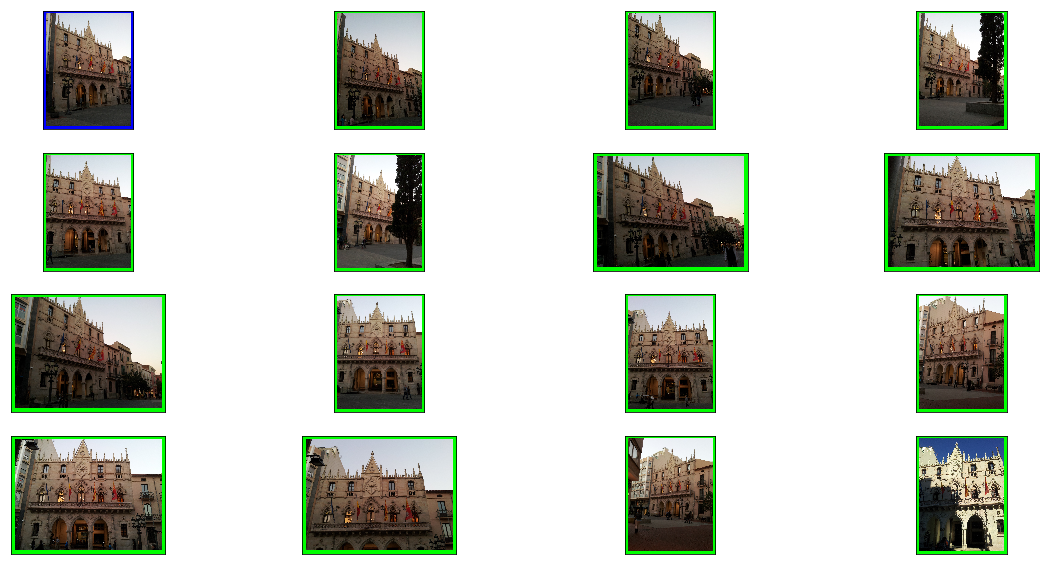

In [43]:
query_id = '168-2743-15592.jpg'
ER.single_eval(params,query_id)

farmacia_albinyana
450
Displaying...


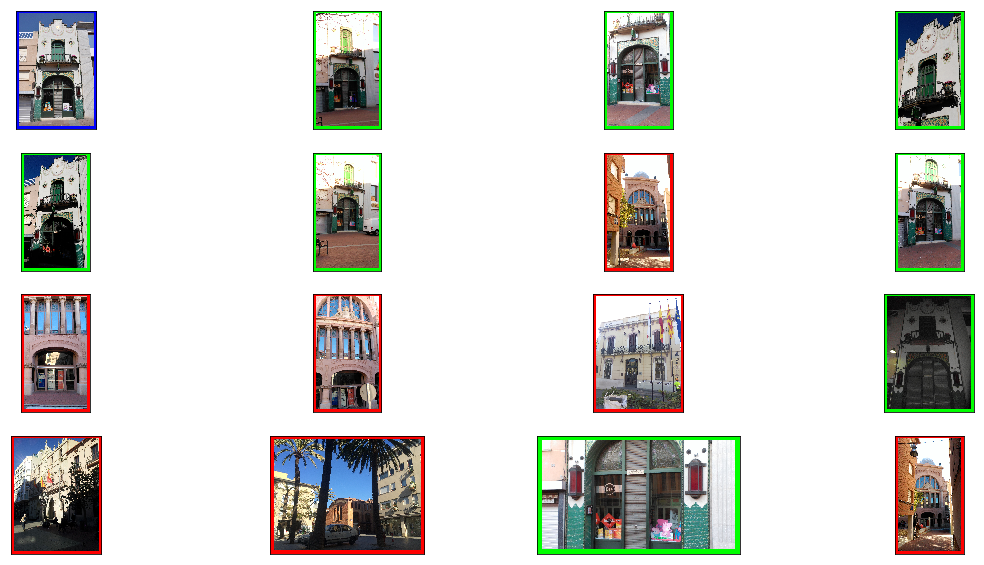

In [44]:
query_id = '4516-28549-2929.jpg'
ER.single_eval(params,query_id)

dona_treballadora
450
Displaying...


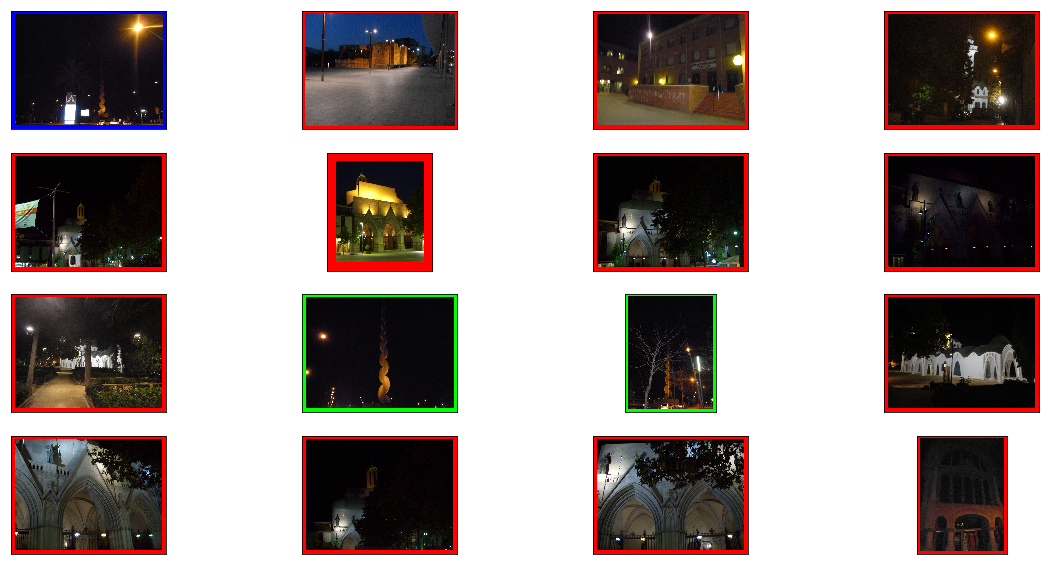

In [46]:
query_id = '3886-4500-23395.jpg'
ER.single_eval(params, query_id)

## CLASSIFY

In [48]:
import classify as CL
t = time.time()

CL.train_classifier(params)

print "Done. Time elapsed:", time.time() - t

Chosen parameters {'kernel': 'rbf', 'C': 100, 'gamma': 0.01}
Score during tuning: 0.618307797067
Done. Time elapsed: 70.0036709309


## EVALUATE CLASSIFICATION

In [49]:
import eval_classification as EC
f1, precision, recall, accuracy, cm, labels = EC.eval_classification(params)

print zip(labels,f1)
print "==============================="
print "F1:", np.mean(f1)
print "Precision:", np.mean(precision)
print "Recall:", np.mean(recall)
print "Accuracy:", np.mean(accuracy)

[('ajuntament', 1.0), ('castell_cartoixa', 0.58823529411764697), ('catedral', 0.63636363636363646), ('desconegut', 0.72992700729926996), ('dona_treballadora', 0.37499999999999994), ('escola_enginyeria', 0.69565217391304346), ('estacio_nord', 0.40000000000000002), ('farmacia_albinyana', 0.77777777777777768), ('masia_freixa', 0.43478260869565222), ('mercat_independencia', 0.70588235294117641), ('mnactec', 0.4210526315789474), ('societat_general', 0.625), ('teatre_principal', 0.82352941176470584)]
F1: 0.631784838035
Precision: 0.696683871684
Recall: 0.602564102564
Accuracy: 0.666666666667


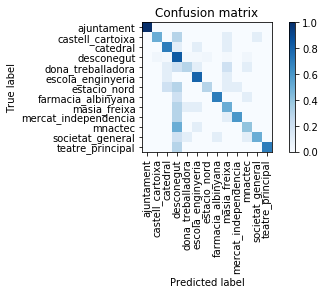

In [50]:
EC.plot_confusion_matrix(cm,labels,normalize = True)

Number of images: 10


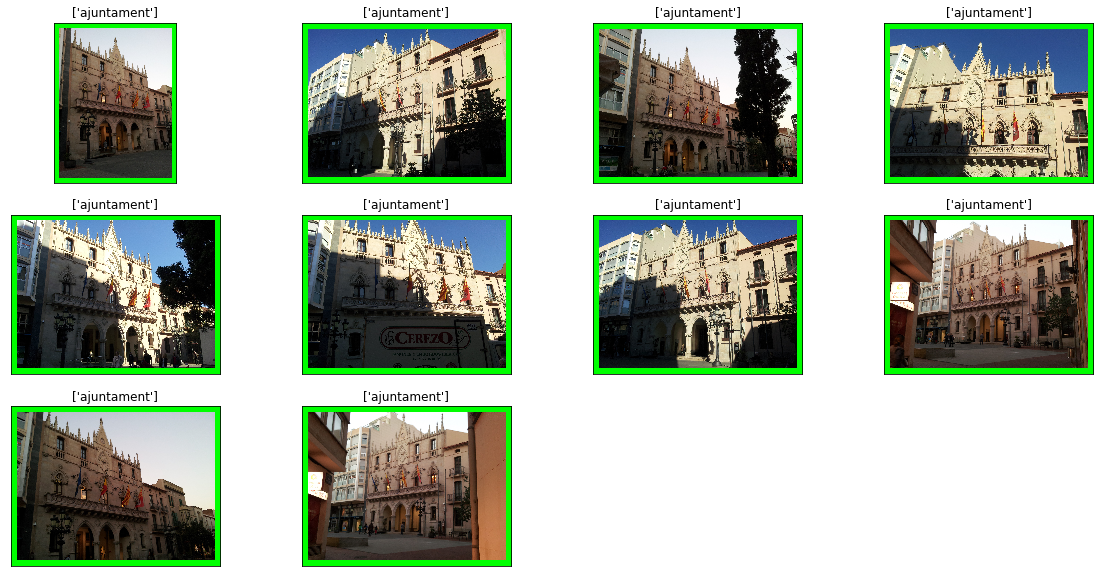

In [51]:
class_name = 'ajuntament'
EC.plot_class(params,class_name)

Number of images: 6


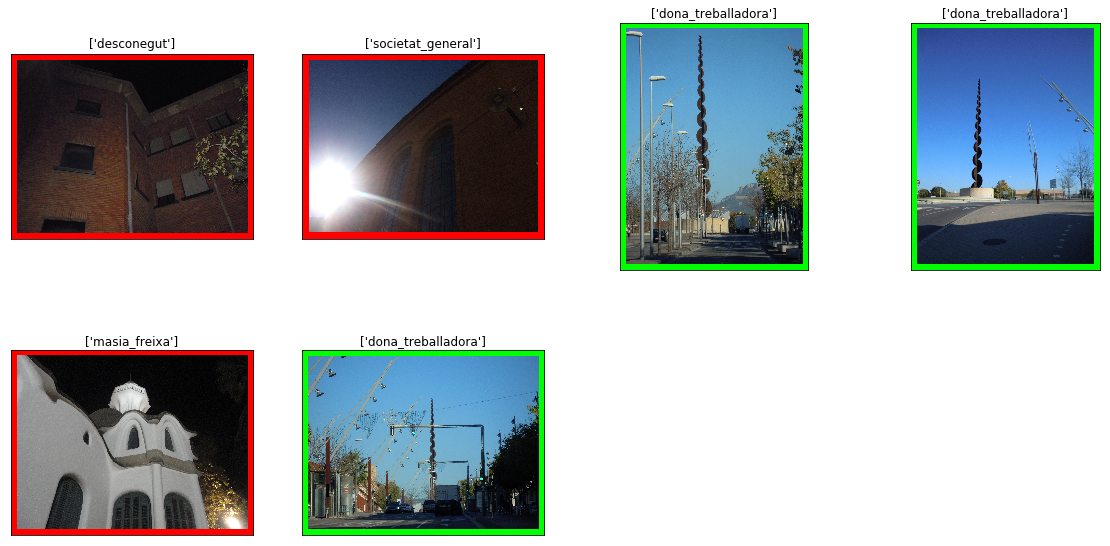

In [52]:
class_name = 'dona_treballadora'
EC.plot_class(params,class_name)

Number of images: 77


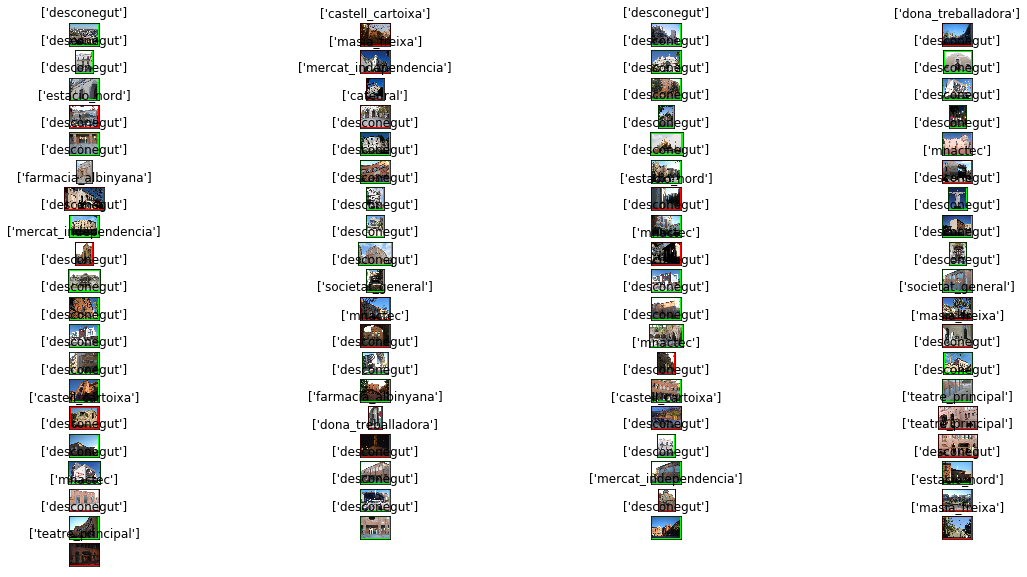

In [53]:
class_name = 'desconegut'
EC.plot_class(params,class_name)